In [5]:
def load(directory, option):
    if option.lower() == 'raw data':
        dirname = "/RawData/"
        extension = ".csv"

    files_list = [f for f in os.listdir(directory + dirname) if f.lower().endswith(extension)]
    list_objects = []
    for file in files_list:
        path = directory + dirname + file
        an_object = np.genfromtxt(path, delimiter=",")
        list_objects.extend(an_object)
    # return a list[Array_TimeSeries]
    return list_objects

In [6]:
def dot_products_2(q, t):
    # concatenante n-m zeros for Query
    m, n = len(q), len(t)
    # reverse the Query
    q_r = q[::-1]
    q_ra = np.concatenate([q_r, np.zeros(n - m)])
    q_raf = np.fft.fft(q_ra)
    t_af = np.fft.fft(t)
    qt = np.fft.ifft(q_raf * t_af)
    return qt
q = [1, 2, 3, 4]
t = [1, 2, 3, 4]
print(np.dot(q,t))
dot_products_2(q, t)

30


array([24.+0.j, 22.+0.j, 24.+0.j, 30.+0.j])

In [3]:
import pandas as pd
import numpy as np
path = "/Users/Jingwei/PycharmProjects/distributed_use/venv/TestDataset/UCR_TS_Archive_2015/StarLightCurves/"
filename= "StarLightCurves_TRAIN"
testFile = pd.read_csv(path+filename, header=None)
testFile.info()


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 1025 entries, 0 to 1024
dtypes: float64(1024), int64(1)
memory usage: 7.8 MB


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [1]:
dp = sm.calculate_distances(t,q,"mass_v1")

ModuleNotFoundError: No module named 'similarity_measures'

In [7]:
m_list =range(1, 10, 5)
print(m_list)

range(1, 10, 5)


In [4]:
import numpy as np
np.zeros()

TypeError: Required argument 'shape' (pos 1) not found

In [20]:
a = np.array([[1,2,3],[4,5,6],[7,8,9],[7,8,9]])
list(a)/2


TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [24]:
keys = range(0, 18)
len(keys)

18

In [22]:
shap_set = [1,2,3]

shap_set = [s for s in shap_set if s == 2]
shap_set

[2]

In [5]:
import numpy as np
a = np.array([])
b = np.append(a, [1,2])
c = np.concatenate([b, [1,2]],axis=0)
c

array([1., 2., 1., 2.])

In [10]:
a = [0.50797,2,4,5,6]
b = [1, 2, 3, 5.1, str(a)]
import pandas as pd
row1 = pd.DataFrame([a])
row2 = pd.DataFrame([b])
output = row1.append(row2)
output.to_csv("~/Downloads/output.csv", index=False)

In [124]:
  
from matplotlib import pyplot as plt

loss_k5_w10_stack02 = pd.read_csv("~/Desktop/ISMAP_results/k5_w10_stack02_loss.csv")
loss_k10_w10_stack02 = pd.read_csv("~/Desktop/ISMAP_results/k10_w10_stack02_loss.csv")
loss_k10_w20_stack10 = pd.read_csv("~/Desktop/ISMAP_results/k10_w20_stack10_loss.csv")
loss_k10_w20_stack10_loss_avgtest = pd.read_csv("~/Desktop/ISMAP_results/k10_w20_stack10_loss_avgtest.csv")
def draw_loss(loss_df):
    t_stamp = loss_df["t_stamp"].tolist()
    cum_loss = loss_df["cum_loss"].tolist()
    avg_loss = loss_df["avg_loss"].tolist()
    loss_batch = loss_df["loss_batch"].tolist()
    PH = loss_df["PH"].tolist()
    figure = plt.figure(figsize=(8,6), dpi=60)
    ax1 = figure.add_subplot(311)
    ax2 = figure.add_subplot(312, sharex = ax1)
    ax3 = figure.add_subplot(313, sharex = ax1)
    ax1.plot(t_stamp, cum_loss, label="cum_loss")
    ax2.plot(t_stamp, avg_loss, label="avg_loss")
    ax3.plot(t_stamp, PH, label="PH score")
    ax2.plot(t_stamp, loss_batch, label = "loss_batch")
    ax1.legend()
    ax2.legend()
    ax3.legend()
    plt.show()

def sigmoid(x, thelta, x0):
    return (1 / float(1 + np.exp(-thelta*(x-x0))))

def f_jump(x, thresh):
    if x > thresh: return 1
    elif x == thresh : return 0.5
    else: return 0
    
def draw_lossBatch(loss_df, thelta):
    t_stamp = loss_df["t_stamp"].tolist()
    loss_batch = loss_df["loss_batch"].tolist()
    x = np.arange(-1, 1.4, 0.01)
    figure = plt.figure(figsize=(8,6), dpi=60)
    ax1 = figure.add_subplot(111)
    ax1.set_xlabel("Dist(TS, Shapelet)", fontsize=12)
    ax1.set_ylabel("Loss Value", fontsize=12)
    ax1.plot(x, [sigmoid(point,thelta, 0.2) for point in x], 'b', label='Sigmoid Loss Function')
    #ax2.plot(t_stamp, loss_batch, label = "loss_batch")
    
    x_lossBatch = [np.divide(np.log(y/(1-y)), thelta) + 0.2 for y in loss_batch]
    ax1.scatter(x_lossBatch, loss_batch, c='r', label="TS Loss by Sigmoid")
    
    #ax1.vlines(0.2, 0, 1, colors = "r", linestyles = "dashed")
    ax1.plot(x, [f_jump(point, 0.2) for point in x], 'g', label='0-1 Loss Function')
    ax1.scatter(x_lossBatch, [f_jump(point, 0.2) for point in x_lossBatch], label="TS Loss by 0-1 Loss Func.")
    ax1.annotate('Dist. Threshold of Shapelet', xy=(0.2, 0), xytext=(0.4, 0.2),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    ax1.legend()
    plt.savefig("/Users/Jingwei/Downloads/Loss_Func_Plot.eps")





/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log


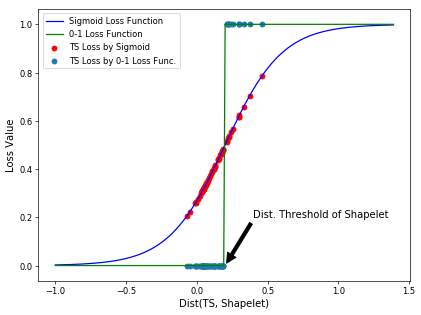

In [125]:
draw_lossBatch(loss_k10_w20_stack10, 5)
#draw_loss(loss_k10_w20_stack10_loss_avgtest)

In [7]:
shap_df_k5 = pd.read_csv("~/Desktop/ISMAP_results/k5_w10_stack02_shap.csv")
shap_df_k10 = pd.read_csv("~/Desktop/ISMAP_results/k10_w10_stack02_shap.csv")
shap_df_k10_w20_stack10 = pd.read_csv("~/Desktop/ISMAP_results/k10_w20_stack10_shap.csv")
def select_shapelet(shap_df, t_stamp, Class):
    return shap_df[shap_df["t_stamp"]==t_stamp][shap_df["shap.Class"]==Class]
def draw_shapelet(shap_df, firstK, t_stamp, Class):
    shap_subseq = shap_df['shap.subseq'].tolist()
    shap_score = shap_df['shap.score'].tolist()
    figure = plt.figure(figsize=(8,6), dpi=60)
    i = 1
    for shap in shap_subseq[:firstK]:
        shap_list = shap[1:-1].split()
        shap_list = [float(i) for i in shap_list]
        x = list(range(0, len(shap_list)))
        #ax = figure.add_subplot(int(firstK**0.5),int(firstK**0.5)+1, i)
        ax = figure.add_subplot(111)
        ax.plot(x, shap_list, label="Score: "+ str(round(shap_score[i-1],3)))
        ax.legend()
        i += 1
        #plt.savefig("/Users/Jingwei/Downloads/Shapelet_Time"+str(t_stamp)+"_Class"+str(Class)[:-2]+".eps")
    plt.show()
    

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


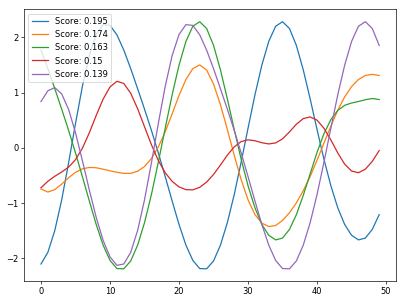

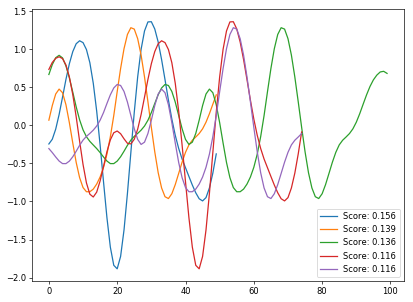

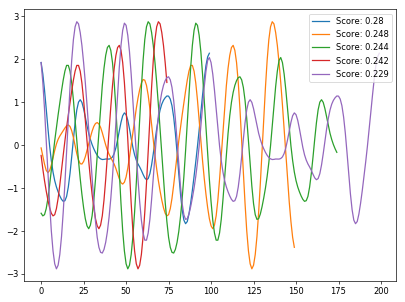

In [8]:
shap_df1 = select_shapelet(shap_df_k10,1010,1.0)
draw_shapelet(shap_df1, 5, 1010, 1.0)

shap_df2 = select_shapelet(shap_df_k10,990,1.0)
draw_shapelet(shap_df2, 5, 990, 1.0)

shap_df3 = select_shapelet(shap_df_k10,1010,-1.0)
draw_shapelet(shap_df3, 5, 1010, -1.0)


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


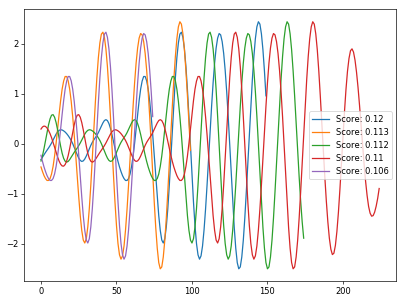

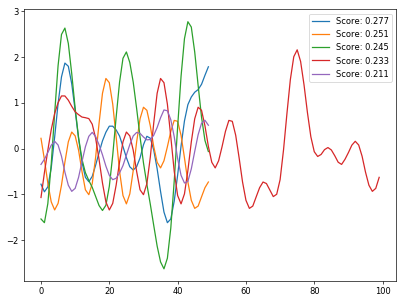

In [9]:
shap_df3 = select_shapelet(shap_df_k10,30,-1.0)
draw_shapelet(shap_df3, 5, 30,-1.0)

shap_df4 = select_shapelet(shap_df_k10,60,-1.0)
draw_shapelet(shap_df4, 5, 60,-1.0)

In [10]:

import numpy as np
import pandas as pd

from bokeh.plotting import figure, show, output_file
from bokeh.palettes import brewer

N = 20
cats = 10
df = pd.DataFrame(np.random.randint(10, 100, size=(N, cats))).add_prefix('y')
df

,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9
0,13,89,76,16,88,81,35,47,66,79
1,65,96,68,90,19,66,32,95,98,46
2,25,67,46,83,91,90,95,76,60,78
3,49,92,60,21,70,34,56,31,66,96
4,55,57,30,62,69,93,44,65,21,44
5,56,77,73,37,23,49,98,98,75,20
6,43,28,62,55,98,23,79,54,87,55
7,58,16,35,68,31,92,32,35,66,48
8,73,19,99,60,48,89,41,86,88,67
9,94,29,37,81,34,24,22,68,92,86


In [11]:

def stacked(df):
    df_top = df.cumsum(axis=1)
    df_bottom = df_top.shift(axis=1).fillna({'y0': 0})[::-1]
    df_stack = pd.concat([df_bottom, df_top], ignore_index=True)
    return df_stack

areas = stacked(df)
colors = brewer['Spectral'][areas.shape[1]]
x2 = np.hstack((df.index[::-1], df.index))

p = figure(x_range=(0, N-1), y_range=(0, 800))
p.grid.minor_grid_line_color = '#eeeeee'

p.patches([x2] * areas.shape[1], [areas[c].values for c in areas],
          color=colors, alpha=0.8, line_color=None)

output_file('stacked_area.html', title='stacked_area.py example')

show(p)


In [12]:
plot = figure(plot_height=300, plot_width=500, title='Concept Drift Detection')
plot.line([1 ,5], [2,2], legend="avg_loss", line_color="red", line_width=2)

<div style="display: table;"><div style="display: table-row;"><div style="display: table-cell;"><b title="bokeh.models.renderers.GlyphRenderer">GlyphRenderer</b>(</div><div style="display: table-cell;">id&nbsp;=&nbsp;'1157', <span id="1168" style="cursor: pointer;">&hellip;)</span></div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">data_source&nbsp;=&nbsp;ColumnDataSource(id='1154', ...),</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">glyph&nbsp;=&nbsp;Line(id='1155', ...),</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">hover_glyph&nbsp;=&nbsp;None,</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">js_event_callbacks&nbsp;=&nbsp;{},</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">js_property_callbacks&nbsp;=&nbsp;{},</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">level&nbsp;=&nbsp;'glyph',</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">muted&nbsp;=&nbsp;False,</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">muted_glyph&nbsp;=&nbsp;None,</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">name&nbsp;=&nbsp;None,</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">nonselection_glyph&nbsp;=&nbsp;Line(id='1156', ...),</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">selection_glyph&nbsp;=&nbsp;None,</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">subscribed_events&nbsp;=&nbsp;[],</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">tags&nbsp;=&nbsp;[],</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">view&nbsp;=&nbsp;CDSView(id='1158', ...),</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">visible&nbsp;=&nbsp;True,</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">x_range_name&nbsp;=&nbsp;'default',</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">y_range_name&nbsp;=&nbsp;'default')</div></div></div>
<script>
(function() {
  var expanded = false;
  var ellipsis = document.getElementById("1168");
  ellipsis.addEventListener("click", function() {
    var rows = document.getElementsByClassName("1167");
    for (var i = 0; i < rows.length; i++) {
      var el = rows[i];
      el.style.display = expanded ? "none" : "table-row";
    }
    ellipsis.innerHTML = expanded ? "&hellip;)" : "&lsaquo;&lsaquo;&lsaquo;";
    expanded = !expanded;
  });
})();
</script>

In [13]:
data = {'x_values': [1, 2, 3, 4, 5],
        'y_values': [6, 7, 2, 3, 6]}
data['x_values']

[1, 2, 3, 4, 5]

In [14]:
from bokeh.models import ColumnDataSource, AjaxDataSource
data = {'x_values': [1, 2, 3, 4, 5],
        'y_values': [6, 7, 2, 3, 6]}
source = ColumnDataSource(data=data)
print(source.data["x_values"])

[1, 2, 3, 4, 5]


In [15]:
import numpy as np
test1 = np.array([1,2])
test2 = np.array([1,2])
a = ['1', '2']
b = ['1', '2']
animal = ['cat', 'dog', 'rabbit']
animal.append('guinea pig')
a.append(b)
a
#animal


['1', '2', ['1', '2']]

In [13]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
#a[-2:][-2:]
#a[np.ix_([0,2],[1,2])]
a[:2, :2]


array([[1, 2],
       [4, 5]])

In [1]:
def sliding_window(sequence, win_size, step=1):
    # Verify the inputs
    try:
        it = iter(sequence)
    except TypeError:
        raise Exception("**ERROR** sequence must be iterable.")
    if not ((type(win_size) == type(0)) and (type(step) == type(0))):
        raise Exception("**ERROR** type(winSize) and type(step) must be int.")
    if step > win_size:
        raise Exception("**ERROR** step must not be larger than winSize.")
    if win_size > len(sequence):
        raise Exception("**ERROR** winSize must not be larger than sequence length.")

    # Pre-compute number of chunks to emit
    num_chunks = ((len(sequence) - win_size) / step) + 1

    # Do the work
    for i in range(0, int(num_chunks * step), step):
        yield sequence[i:i + win_size]

In [4]:
seq = [1,2,3,4,5]
print(list(sliding_window(seq, 2)))
#for elem in MP_all:
import re
MP_new = MP_list[0][2:-4].replace(' ', '').replace("\n", '')
MP_new = re.split(',', MP_new)
[float(num) for num in MP_new]




mp_unit = mp_list[0].replace('[','').replace('(','').replace(']','').replace(')','')
mp_unit.replace(' ', '').replace("\n", '').split(',')


[[1, 2], [2, 3], [3, 4], [4, 5]]


In [43]:
import pandas as pd 
import re
ts_id = 1
m = 8
dfMP = pd.read_csv("/Users/Jingwei/PycharmProjects/distributed_use/venv/TestDataset/UCR_TS_Archive_2015/TwoLeadECG/IntermediateResultMPs.csv")
#MP_all = dfMP['mp_dict_same'].tolist()[1:]
MP_one = dfMP[dfMP['ts_id']==ts_id][dfMP['m']==m]
mp_dict_same = MP_one['mp_dict_same'].tolist()[0]
mp_unit = mp_dict_same.replace('[','').replace('(','').replace(']','').replace(')','')
#mp_unit.split("array")[1].replace(' ', '').replace("\n", '').split(',')
#mp_dict_same.split("array")[1:]
mp_unit.split("array")[1:]


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


['6.70345332e-07, 7.31094193e-07, 1.69576389e-07, 1.90203906e-07,\n       4.71219340e-07, 2.54797783e-07, 1.34009030e-06, 6.05131081e-07,\n       3.31894342e-07, 3.03503439e-07, 4.21511967e-07, 4.78570965e-07,\n       1.03411367e-07, 5.96280923e-08, 2.95090854e-08, 6.05111718e-08,\n       4.25691018e-07, 1.68650894e-07, 1.84181059e-07, 2.23111432e-07,\n       8.42946290e-08, 1.03477738e-07, 2.06689928e-07, 2.31928732e-07,\n       1.00330373e-06, 1.33080520e-06, 1.40586292e-06, 1.17577545e-06,\n       1.07049826e-06, 6.68476518e-07, 2.55257181e-07, 7.68522873e-07,\n       1.39195075e-06, 1.05346459e-06, 4.50332408e-07, 3.47864009e-07,\n       2.02520990e-07, 2.67303604e-07, ',
 '1.73656581, 1.75237225, 1.50240112, 0.90977242, 1.00720781,\n       0.70702348, 1.77621611, 1.34427547, 1.07131515, 1.61424874,\n       2.22526139, 2.70143013, 0.75089386, 0.20722011, 0.18730553,\n       0.7270424 , 1.5573095 , 0.4211837 , 0.36758999, 0.36492366,\n       0.30880076, 0.39944601, 0.42336909, 0.973

[1, 2, 3, 1, 2, 3]

In [163]:
hash("1FJubezif")

-1594173413788611145

In [79]:
import numpy as np 
import pandas as pd
df_file = pd.read_csv("/Users/Jingwei/PycharmProjects/distributed_use/venv/TestDataset/UCR_TS_Archive_2015/ElectricDevices/ElectricDevices_TRAIN",header=None)
print(len(df_file[df_file[0]==-1]))
print(len(df_file[df_file[0]==0]))
print(len(df_file[df_file[0]==1]))
print(len(df_file[df_file[0]==2]))
print(len(df_file[df_file[0]==3]))
print(len(df_file[df_file[0]==4]))
print(len(df_file[df_file[0]==5]))
print(len(df_file[df_file[0]==6]))
print(len(df_file[df_file[0]==7]))
#C_1: 292
#C_2: 177
#C_3: 10
#C_4: 19
#C_5: 2


0
0
727
2231
851
1474
2406
509
728


In [104]:
df_file_train = pd.read_csv("/Users/Jingwei/PycharmProjects/distributed_use/venv/TestDataset/UCR_TS_Archive_2015/ElectricDevices/ElectricDevices_TRAIN",header=None)
df_file_test = pd.read_csv("/Users/Jingwei/PycharmProjects/distributed_use/venv/TestDataset/UCR_TS_Archive_2015/ElectricDevices/ElectricDevices_TEST",header=None)
folder_ConceptDriftFile = "/Users/Jingwei/Desktop/ISMAP_results/concept_drift_files"
DriftFile_1 = folder_ConceptDriftFile + "/concept1.csv"
DriftFile_2 = folder_ConceptDriftFile + "/concept2.csv"
DriftFile_3 = folder_ConceptDriftFile + "/concept3.csv"
DriftFile_full = folder_ConceptDriftFile + "/conceptFull.csv"

def df_partition(dataframe):
    class_list = dataframe[0].drop_duplicates(keep='first', inplace=False)
    df_list = []
    for c in list(class_list):
        df_list.append(dataframe[dataframe[0]==c])
        #print(df)
    return df_list, list(class_list)


def concept_construct(df_list, class_list, partition_num):
    n_list = []
    for i in range(len(class_list)):
        datasize_i = len(df_list[i])
        n_list.append(int(datasize_i/partition_num))    
    df_Concept_list = []
    for i in range(partition_num):
        df_Concept = pd.DataFrame()
        for j in range(len(class_list)):
            start_index = i * n_list[j]
            end_index = (i+1) * n_list[j]
            df_Concept = df_Concept.append(df_list[j][start_index:end_index])
            df_Concept.reset_index(drop=True, inplace=True)
        #shift the label for each class distribution/subsets  
        df_Concept[0] = df_Concept[0] - i
        index_1 = 0
        index_2 = 0
        for k in range(i):
            index_2 += n_list[k]
        df_Concept[0][index_1:index_2] += len(class_list)
        df_Concept = df_Concept.sample(frac=1).reset_index(drop=True)
        df_Concept_list.append(df_Concept)
    return df_Concept_list

elemt1, elemt2 = df_partition(df_file_train)
df_list = concept_construct(elemt1, elemt2, 3)

df_full = pd.DataFrame()
for df in df_list:
    df_full = df_full.append(df)
df_list[0].to_csv(DriftFile_1, index=False)
df_list[1].to_csv(DriftFile_2, index=False)
df_list[2].to_csv(DriftFile_3, index=False)
df_full.to_csv(DriftFile_full, index=False)


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [38]:


Trace = [[1, 1, 0.99, 0.99, 0.97, 1, 1],[0.553,
4.12,
4.33,
4.42,
8.06,
8.18,
8.18]]
MoteStrain = [[0.9010, 0.9169, 0.9089, 0.9065, 0.9010, 0.8858, 0.9097],[0.062,
0.093,
0.134,
0.131,
0.173,
0.194,
0.209]]
SonyAIBORobotSurface = [[0.8769, 0.8220, 0.9151, 0.9068, 0.9068, 0.9068, 0.9068],[0.085,
0.152,
0.322,
0.360,
0.360,
0.360,
0.360]]
SonyAIBORobotSurfaceII = [[0.7985,
0.8258,
0.8583,
0.7975,
0.8468,
0.8562,
0.8562],[0.094,
0.335,
0.571,
0.957,
1.324,
1.264,
1.300]]
ItalyPowerDemand = [[0.9397,
0.9466,
0.9446,
0.9446,
0.9456,
0.9368,
0.9018],[0.349,
0.210,
0.642,
1.523,
1.320,
2.400,
3.143]]
ECGFiveDays = [[0.9733,
0.9617,
0.9826,
0.9489,
0.9489,
0.9477,
0.9501],[0.115,
0.096,
0.120,
0.341,
0.327,
0.399,
0.474]]
TwoLeadECG = [[0.9737,
0.9561,
0.9710,
0.9622,
0.9535,
0.9631,
0.9679],[0.081,
0.178,
0.237,
0.295,
0.360,
0.294,
0.328]]
ECG5000 = [[0.7898,
0.9109,
0.7396,
0.6780, 
0.8962,
0.8330,
0.7731],[1.195,
1.638,
2.243,
1.870, 
8.397,
46.256,
408]]
FaceFour = [[0.9886,
0.9659,
0.9886,
0.9886,
0.9886,
0.9886,
0.9886],[0.185,
0.204,
0.209,
0.327,
0.225,
0.313,
0.409]]
Symbols = [[0.7651,
0.7979,
0.8082,
0.8113,
0.7774,
0.7887,
0.7887],[0.218,
0.433,
0.681,
0.806,
0.743,
0.848,
0.848]]
Coffee = [[0.7143,
0.8929,
0.9286,
0.8929,
0.8929,
0.8989,
0.8928],[0.096,
0.329,
0.405,
0.614,
0.625,
0.630,
0.616]]
DiatomSizeReduction = [[0.8758,
0.8039,
0.8137,
0.8137,
0.8137,
0.8137,
0.8137],[0.050,
0.161,
0.212,
0.212,
0.212,
0.212,
0.212]]
Gun_Point = [[0.9066,
0.9733,
0.8667,
0.9667,
0.9133,
0.8933,
0.9000],[0.094,
0.335,
0.571,
0.957,
1.324,
1.264,
1.300]]
SyntheticControl = [[0.7467,
0.7367,
0.77,
0.70,
0.70,
0.70,
0.70], [2.602,
7.574,
14.943,
35.793,
35.793,
35.793,
35.793]]
dataset_list = [Trace, MoteStrain, SonyAIBORobotSurface, SonyAIBORobotSurfaceII, ItalyPowerDemand, 
                ECGFiveDays, TwoLeadECG, ECG5000, 
                FaceFour, Symbols, Coffee, DiatomSizeReduction, 
                Gun_Point, SyntheticControl]
dataset_name = ['Trace', 'MoteStrain', 'SonyAIBO.I', 'SonyAIBO.II', 'ItalyPowerD.', 
                'ECGFiveDays', 'TwoLeadECG', 'ECG5000', 
                'FaceFour', 'Symbols', 'Coffee', 'DiatomSize.', 
                'Gun_Point', 'SyntheticCon.']


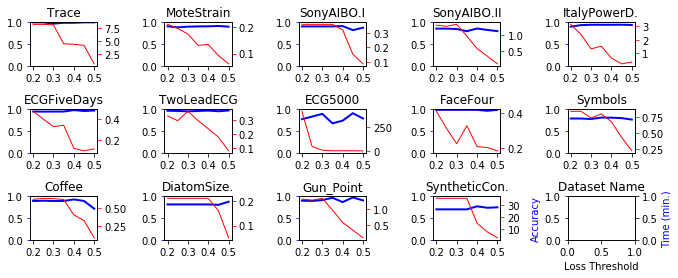

In [39]:
from matplotlib import pyplot as plt
#from dill.source import getname
x = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2]


figure = plt.figure()
plt.subplots_adjust(left=0.1, right=1.5, wspace = 1, hspace = 1)

for i in range(1, 15):
    ax = figure.add_subplot(3, 5, i)
    accuracy = dataset_list[i-1][0]
    time_cost = dataset_list[i-1][1]
    ax.set_ylim(0, 1)
    ax.set_title(dataset_name[i-1])
    #ax.set_title(getname(dataset_list[i-1]))
    ax.plot(x, accuracy, linewidth=2, color='blue')
    #ax.set_xlabel('Loss Threshold')
    #ax.set_ylabel('Accuracy', color='blue')
    ax.tick_params(axis='y', color='blue')
    ax.set_xticks([0.2,0.3,0.4,0.5])
    
    ax_time = ax.twinx()
    #ax_time.set_ylim(0, 1)
    ax_time.plot(x, time_cost,linewidth=1, color='red')
    ax_time.tick_params(axis='y', color='red')

ax_info1 = figure.add_subplot(3, 5, 15)
ax_info1.set_title('Dataset Name')
ax_info1.set_xlabel('Loss Threshold')
ax_info1.set_ylabel('Accuracy', color='blue')
ax_info2 = ax_info1.twinx()
ax_info2.set_ylabel('Time (min.)', color='blue')

plt.savefig('/Users/Jingwei/Downloads/IncrementalTest.eps', bbox_inches = 'tight')

In [119]:
SonyAIBORobotSurfaceII

[0.7985, 0.8258, 0.8583, 0.7975, 0.8468, 0.8562, 0.8562]

In [120]:
import numpy as np 
vec1 = np.array([[1,2,3], [4, 5, 6] , [7, 8, 9]])
vec2 = vec1[1:3, 1:3]
vec2

array([[5, 6],
       [8, 9]])

In [123]:
a  = np.array([1, 2, 3])
b= a 
a =a + 1
b

array([1, 2, 3])

In [2]:
vari = dict(a=[])
vari['a'][-1]

IndexError: list index out of range

In [81]:
import pandas as pd

# For testing the scenario of Time Series Stream, we need to adjust manually the data set to simulate the scenario.
# Sampling the data set "ElectricDevices" into 3 equal-seized subsets with different concepts
UCR_folder = "/Users/Jingwei/PycharmProjects/distributed_use/venv/TestDataset/UCR_TS_Archive_2015/"
dataset_name = "Gun_Point/Gun_Point_TEST"
dataset_file = UCR_folder + dataset_name
df_file_train = pd.read_csv(dataset_file,header=None)
df_file_test = pd.read_csv(UCR_folder+"ElectricDevices/ElectricDevices_TEST",header=None)

def df_partition(dataframe):
    class_list = dataframe[0].drop_duplicates(keep='first', inplace=False)
    df_list = []
    for c in list(class_list):
        df_list.append(dataframe[dataframe[0]==c])
    return df_list, list(class_list)


,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,1,-1.12500,-1.13130,-1.13830,-1.14670,-1.13860,-1.14140,-1.14370,-1.14440,-1.15490,...,-1.205600,-1.281200,-1.32340,-1.345800,-1.34450,-1.30110,-1.26590,-1.21270,-1.20620,-1.21840
1,2,-0.62696,-0.62592,-0.62754,-0.62633,-0.62409,-0.62471,-0.62501,-0.62418,-0.62402,...,-0.620020,-0.621500,-0.62153,-0.624090,-0.62399,-0.62435,-0.62438,-0.61947,-0.61206,-0.60642
2,2,-2.00120,-1.99960,-1.99950,-1.99920,-1.99900,-2.00030,-1.99840,-2.00070,-2.00000,...,0.312800,0.242220,0.14572,0.014012,-0.15178,-0.33343,-0.57743,-0.81272,-1.07110,-1.32340
3,1,-1.00460,-0.99984,-0.99525,-0.99202,-0.99120,-0.98756,-0.99647,-0.99688,-0.99867,...,-1.080200,-1.060200,-1.04450,-1.039500,-1.04070,-1.04420,-1.04410,-1.04490,-1.04420,-1.04330
4,1,-0.74263,-0.74377,-0.74390,-0.74487,-0.74475,-0.74536,-0.74708,-0.74661,-0.74671,...,-0.699310,-0.696900,-0.69406,-0.689150,-0.68753,-0.68280,-0.68215,-0.68103,-0.67052,-0.65740
5,2,-0.64219,-0.64657,-0.65166,-0.65329,-0.65668,-0.65568,-0.65746,-0.65809,-0.65813,...,-0.569960,-0.568720,-0.56849,-0.566540,-0.56606,-0.56603,-0.56440,-0.56343,-0.56364,-0.56041
6,1,-1.10630,-1.16560,-1.25260,-1.34160,-1.43220,-1.45500,-1.42870,-1.36850,-1.31470,...,-0.953010,-0.958620,-0.96228,-0.970350,-0.98846,-1.02110,-1.06810,-1.14080,-1.24030,-1.32470
7,2,-1.14040,-1.13820,-1.13470,-1.13140,-1.12840,-1.12200,-1.11970,-1.12050,-1.12210,...,-1.121100,-1.123600,-1.11960,-1.118000,-1.11750,-1.11700,-1.11600,-1.11580,-1.11500,-1.11690
8,2,-0.70239,-0.70085,-0.69996,-0.69718,-0.69459,-0.69244,-0.69286,-0.69187,-0.69060,...,-0.806330,-0.809390,-0.80579,-0.804930,-0.80232,-0.80005,-0.79740,-0.79818,-0.79514,-0.79359
9,1,-0.58663,-0.58569,-0.58299,-0.58311,-0.58147,-0.57925,-0.58000,-0.58185,-0.58221,...,-0.745790,-0.746250,-0.74708,-0.747360,-0.74882,-0.75054,-0.75066,-0.75117,-0.75129,-0.75159


In [62]:
import numpy as np
ElectricDeviceFile = "/Users/Jingwei/PycharmProjects/distributed_use/venv/TestDataset/UCR_TS_Archive_2015/ElectricDevices/ElectricDevices_TRAIN"
class TimeSeries(object):
    def __init__(self):
        self.class_timeseries = ''
        self.dimension_name = ''
        self.discmP = {}
        self.threshP = {}
        self.timeseries = None
        self.matched = False
        self.name = ''
        self.id = 0

def load_dataset(directory):
    #return: list of dictionary, each dict. has one single element {t.name:t.sequence}
    array_ts = []
    list_rawData = np.genfromtxt(directory, delimiter=",")
    np.random.shuffle(list_rawData)
    i = 1
    for d in list_rawData:
        # d[0] is the class of TS in the original data, d[1:] is the data in TS
        t = TimeSeries()
        t.class_timeseries = d[0]
        t.timeseries = d[1:]
        t.id = i
        t.name = hash(d[1:].tostring())
        array_ts.append({t.name:t})
        i += 1
    return array_ts

import matplotlib.pyplot as plt
list_timeseries = load_dataset(ElectricDeviceFile)
name_dataset = {k: v for ds in list_timeseries for k, v in ds.items()}
dataset_list = list(name_dataset.values())
TS_of_class = [ts for ts in dataset_list if ts.class_timeseries==3]
x = range(len(TS_of_class[0].timeseries))
y = TS_of_class[0].timeseries
plt.plot(x, y)
plt.show()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,1,-1.12500,-1.13130,-1.13830,-1.14670,-1.13860,-1.14140,-1.14370,-1.14440,-1.15490,...,-1.205600,-1.281200,-1.32340,-1.345800,-1.34450,-1.30110,-1.26590,-1.21270,-1.20620,-1.21840
1,2,-0.62696,-0.62592,-0.62754,-0.62633,-0.62409,-0.62471,-0.62501,-0.62418,-0.62402,...,-0.620020,-0.621500,-0.62153,-0.624090,-0.62399,-0.62435,-0.62438,-0.61947,-0.61206,-0.60642
2,2,-2.00120,-1.99960,-1.99950,-1.99920,-1.99900,-2.00030,-1.99840,-2.00070,-2.00000,...,0.312800,0.242220,0.14572,0.014012,-0.15178,-0.33343,-0.57743,-0.81272,-1.07110,-1.32340
3,1,-1.00460,-0.99984,-0.99525,-0.99202,-0.99120,-0.98756,-0.99647,-0.99688,-0.99867,...,-1.080200,-1.060200,-1.04450,-1.039500,-1.04070,-1.04420,-1.04410,-1.04490,-1.04420,-1.04330
4,1,-0.74263,-0.74377,-0.74390,-0.74487,-0.74475,-0.74536,-0.74708,-0.74661,-0.74671,...,-0.699310,-0.696900,-0.69406,-0.689150,-0.68753,-0.68280,-0.68215,-0.68103,-0.67052,-0.65740
5,2,-0.64219,-0.64657,-0.65166,-0.65329,-0.65668,-0.65568,-0.65746,-0.65809,-0.65813,...,-0.569960,-0.568720,-0.56849,-0.566540,-0.56606,-0.56603,-0.56440,-0.56343,-0.56364,-0.56041
6,1,-1.10630,-1.16560,-1.25260,-1.34160,-1.43220,-1.45500,-1.42870,-1.36850,-1.31470,...,-0.953010,-0.958620,-0.96228,-0.970350,-0.98846,-1.02110,-1.06810,-1.14080,-1.24030,-1.32470
7,2,-1.14040,-1.13820,-1.13470,-1.13140,-1.12840,-1.12200,-1.11970,-1.12050,-1.12210,...,-1.121100,-1.123600,-1.11960,-1.118000,-1.11750,-1.11700,-1.11600,-1.11580,-1.11500,-1.11690
8,2,-0.70239,-0.70085,-0.69996,-0.69718,-0.69459,-0.69244,-0.69286,-0.69187,-0.69060,...,-0.806330,-0.809390,-0.80579,-0.804930,-0.80232,-0.80005,-0.79740,-0.79818,-0.79514,-0.79359
9,1,-0.58663,-0.58569,-0.58299,-0.58311,-0.58147,-0.57925,-0.58000,-0.58185,-0.58221,...,-0.745790,-0.746250,-0.74708,-0.747360,-0.74882,-0.75054,-0.75066,-0.75117,-0.75129,-0.75159


In [41]:
df_list, class_list = df_partition(df_file_train)
n_list = []
partition_num = 3
for i in range(len(class_list)):
    datasize_i = len(df_list[i])
    n_list.append(int(datasize_i/partition_num))
df_Concept_list = []

i=0
df_Concept = pd.DataFrame()
for j in range(len(class_list)):
    start_index = i * n_list[j]
    end_index = (i+1) * n_list[j]
    df_Concept = df_Concept.append(df_list[j][start_index:end_index])
    df_Concept.reset_index(drop=True, inplace=True)

df_Concept[0] = df_Concept[0] - i
index_1 = 0
index_2 = 0
for k in range(i):
    index_2 += n_list[k]
df_Concept[0][index_1:index_2] += len(class_list)


,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,1,-1.12500,-1.13130,-1.13830,-1.14670,-1.13860,-1.14140,-1.14370,-1.14440,-1.15490,...,-1.205600,-1.281200,-1.32340,-1.345800,-1.34450,-1.30110,-1.26590,-1.21270,-1.20620,-1.21840
1,2,-0.62696,-0.62592,-0.62754,-0.62633,-0.62409,-0.62471,-0.62501,-0.62418,-0.62402,...,-0.620020,-0.621500,-0.62153,-0.624090,-0.62399,-0.62435,-0.62438,-0.61947,-0.61206,-0.60642
2,2,-2.00120,-1.99960,-1.99950,-1.99920,-1.99900,-2.00030,-1.99840,-2.00070,-2.00000,...,0.312800,0.242220,0.14572,0.014012,-0.15178,-0.33343,-0.57743,-0.81272,-1.07110,-1.32340
3,1,-1.00460,-0.99984,-0.99525,-0.99202,-0.99120,-0.98756,-0.99647,-0.99688,-0.99867,...,-1.080200,-1.060200,-1.04450,-1.039500,-1.04070,-1.04420,-1.04410,-1.04490,-1.04420,-1.04330
4,1,-0.74263,-0.74377,-0.74390,-0.74487,-0.74475,-0.74536,-0.74708,-0.74661,-0.74671,...,-0.699310,-0.696900,-0.69406,-0.689150,-0.68753,-0.68280,-0.68215,-0.68103,-0.67052,-0.65740
5,2,-0.64219,-0.64657,-0.65166,-0.65329,-0.65668,-0.65568,-0.65746,-0.65809,-0.65813,...,-0.569960,-0.568720,-0.56849,-0.566540,-0.56606,-0.56603,-0.56440,-0.56343,-0.56364,-0.56041
6,1,-1.10630,-1.16560,-1.25260,-1.34160,-1.43220,-1.45500,-1.42870,-1.36850,-1.31470,...,-0.953010,-0.958620,-0.96228,-0.970350,-0.98846,-1.02110,-1.06810,-1.14080,-1.24030,-1.32470
7,2,-1.14040,-1.13820,-1.13470,-1.13140,-1.12840,-1.12200,-1.11970,-1.12050,-1.12210,...,-1.121100,-1.123600,-1.11960,-1.118000,-1.11750,-1.11700,-1.11600,-1.11580,-1.11500,-1.11690
8,2,-0.70239,-0.70085,-0.69996,-0.69718,-0.69459,-0.69244,-0.69286,-0.69187,-0.69060,...,-0.806330,-0.809390,-0.80579,-0.804930,-0.80232,-0.80005,-0.79740,-0.79818,-0.79514,-0.79359
9,1,-0.58663,-0.58569,-0.58299,-0.58311,-0.58147,-0.57925,-0.58000,-0.58185,-0.58221,...,-0.745790,-0.746250,-0.74708,-0.747360,-0.74882,-0.75054,-0.75066,-0.75117,-0.75129,-0.75159


In [ ]:
def concept_construct(df_list, class_list, partition_num):
    n_list = []
    for i in range(len(class_list)):
        datasize_i = len(df_list[i])
        n_list.append(int(datasize_i/partition_num))
    df_Concept_list = []
    for i in range(partition_num):
        df_Concept = pd.DataFrame()
        for j in range(len(class_list)):
            start_index = i * n_list[j]
            end_index = (i+1) * n_list[j]
            df_Concept = df_Concept.append(df_list[j][start_index:end_index])
            df_Concept.reset_index(drop=True, inplace=True)
        #shift the label for each class distribution/subsets
        df_Concept[0] = df_Concept[0] - i
        index_1 = 0
        index_2 = 0
        for k in range(i):
            index_2 += n_list[k]
        df_Concept[0][index_1:index_2] += len(class_list)
        #Shuffle the dataset to have random class distribution in sequential order
        df_Concept = df_Concept.sample(frac=1).reset_index(drop=True)
        df_Concept_list.append(df_Concept)
    return df_Concept_list

elemt1, elemt2 = df_partition(df_file_train)
df_list = concept_construct(elemt1, elemt2, 3)
'''df_full = pd.DataFrame()
for df in df_list:
    df_full = df_full.append(df)
print(df_list[2])
'''
folder_ConceptDriftFile = "/Users/Jingwei/Desktop/ISMAP_results/concept_drift_files"
DriftFile_1 = folder_ConceptDriftFile + "/concept1.csv"
DriftFile_2 = folder_ConceptDriftFile + "/concept2.csv"
DriftFile_3 = folder_ConceptDriftFile + "/concept3.csv"
DriftFile_full = folder_ConceptDriftFile + "/conceptFull_test.csv"
df_full = pd.DataFrame()
for df in df_list:
    df_full = df_full.append(df, ignore_index = True)
df_list[0].to_csv(DriftFile_1, index=False)
df_list[1].to_csv(DriftFile_2, index=False)
df_list[2].to_csv(DriftFile_3, index=False)
df_full.to_csv(DriftFile_full, index=False)


,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,1,-1.12500,-1.13130,-1.13830,-1.14670,-1.13860,-1.14140,-1.14370,-1.14440,-1.15490,...,-1.205600,-1.281200,-1.32340,-1.345800,-1.34450,-1.30110,-1.26590,-1.21270,-1.20620,-1.21840
1,2,-0.62696,-0.62592,-0.62754,-0.62633,-0.62409,-0.62471,-0.62501,-0.62418,-0.62402,...,-0.620020,-0.621500,-0.62153,-0.624090,-0.62399,-0.62435,-0.62438,-0.61947,-0.61206,-0.60642
2,2,-2.00120,-1.99960,-1.99950,-1.99920,-1.99900,-2.00030,-1.99840,-2.00070,-2.00000,...,0.312800,0.242220,0.14572,0.014012,-0.15178,-0.33343,-0.57743,-0.81272,-1.07110,-1.32340
3,1,-1.00460,-0.99984,-0.99525,-0.99202,-0.99120,-0.98756,-0.99647,-0.99688,-0.99867,...,-1.080200,-1.060200,-1.04450,-1.039500,-1.04070,-1.04420,-1.04410,-1.04490,-1.04420,-1.04330
4,1,-0.74263,-0.74377,-0.74390,-0.74487,-0.74475,-0.74536,-0.74708,-0.74661,-0.74671,...,-0.699310,-0.696900,-0.69406,-0.689150,-0.68753,-0.68280,-0.68215,-0.68103,-0.67052,-0.65740
5,2,-0.64219,-0.64657,-0.65166,-0.65329,-0.65668,-0.65568,-0.65746,-0.65809,-0.65813,...,-0.569960,-0.568720,-0.56849,-0.566540,-0.56606,-0.56603,-0.56440,-0.56343,-0.56364,-0.56041
6,1,-1.10630,-1.16560,-1.25260,-1.34160,-1.43220,-1.45500,-1.42870,-1.36850,-1.31470,...,-0.953010,-0.958620,-0.96228,-0.970350,-0.98846,-1.02110,-1.06810,-1.14080,-1.24030,-1.32470
7,2,-1.14040,-1.13820,-1.13470,-1.13140,-1.12840,-1.12200,-1.11970,-1.12050,-1.12210,...,-1.121100,-1.123600,-1.11960,-1.118000,-1.11750,-1.11700,-1.11600,-1.11580,-1.11500,-1.11690
8,2,-0.70239,-0.70085,-0.69996,-0.69718,-0.69459,-0.69244,-0.69286,-0.69187,-0.69060,...,-0.806330,-0.809390,-0.80579,-0.804930,-0.80232,-0.80005,-0.79740,-0.79818,-0.79514,-0.79359
9,1,-0.58663,-0.58569,-0.58299,-0.58311,-0.58147,-0.57925,-0.58000,-0.58185,-0.58221,...,-0.745790,-0.746250,-0.74708,-0.747360,-0.74882,-0.75054,-0.75066,-0.75117,-0.75129,-0.75159


In [108]:
import pandas as pd

# For testing the scenario of Time Series Stream, we need to adjust manually the data set to simulate the scenario.
# Sampling the data set "ElectricDevices" into 3 equal-seized subsets with different concepts
UCR_folder = "/Users/Jingwei/PycharmProjects/distributed_use/venv/TestDataset/UCR_TS_Archive_2015/"
dataset_name = "Gun_Point/Gun_Point_TEST"
dataset_file = UCR_folder + dataset_name
df_full= pd.read_csv(dataset_file,header=None)
df_full

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,1,-1.12500,-1.13130,-1.13830,-1.14670,-1.13860,-1.14140,-1.14370,-1.14440,-1.15490,...,-1.205600,-1.281200,-1.32340,-1.345800,-1.34450,-1.30110,-1.26590,-1.21270,-1.20620,-1.21840
1,2,-0.62696,-0.62592,-0.62754,-0.62633,-0.62409,-0.62471,-0.62501,-0.62418,-0.62402,...,-0.620020,-0.621500,-0.62153,-0.624090,-0.62399,-0.62435,-0.62438,-0.61947,-0.61206,-0.60642
2,2,-2.00120,-1.99960,-1.99950,-1.99920,-1.99900,-2.00030,-1.99840,-2.00070,-2.00000,...,0.312800,0.242220,0.14572,0.014012,-0.15178,-0.33343,-0.57743,-0.81272,-1.07110,-1.32340
3,1,-1.00460,-0.99984,-0.99525,-0.99202,-0.99120,-0.98756,-0.99647,-0.99688,-0.99867,...,-1.080200,-1.060200,-1.04450,-1.039500,-1.04070,-1.04420,-1.04410,-1.04490,-1.04420,-1.04330
4,1,-0.74263,-0.74377,-0.74390,-0.74487,-0.74475,-0.74536,-0.74708,-0.74661,-0.74671,...,-0.699310,-0.696900,-0.69406,-0.689150,-0.68753,-0.68280,-0.68215,-0.68103,-0.67052,-0.65740
5,2,-0.64219,-0.64657,-0.65166,-0.65329,-0.65668,-0.65568,-0.65746,-0.65809,-0.65813,...,-0.569960,-0.568720,-0.56849,-0.566540,-0.56606,-0.56603,-0.56440,-0.56343,-0.56364,-0.56041
6,1,-1.10630,-1.16560,-1.25260,-1.34160,-1.43220,-1.45500,-1.42870,-1.36850,-1.31470,...,-0.953010,-0.958620,-0.96228,-0.970350,-0.98846,-1.02110,-1.06810,-1.14080,-1.24030,-1.32470
7,2,-1.14040,-1.13820,-1.13470,-1.13140,-1.12840,-1.12200,-1.11970,-1.12050,-1.12210,...,-1.121100,-1.123600,-1.11960,-1.118000,-1.11750,-1.11700,-1.11600,-1.11580,-1.11500,-1.11690
8,2,-0.70239,-0.70085,-0.69996,-0.69718,-0.69459,-0.69244,-0.69286,-0.69187,-0.69060,...,-0.806330,-0.809390,-0.80579,-0.804930,-0.80232,-0.80005,-0.79740,-0.79818,-0.79514,-0.79359
9,1,-0.58663,-0.58569,-0.58299,-0.58311,-0.58147,-0.57925,-0.58000,-0.58185,-0.58221,...,-0.745790,-0.746250,-0.74708,-0.747360,-0.74882,-0.75054,-0.75066,-0.75117,-0.75129,-0.75159


In [110]:
from random import *

def add_noise(df_raw, degree):
    #the noise degree is between 1-10% in normalised TS data
    df_raw[1:] += uniform(-degree, degree)
    return df_raw

def add_noise_random_position(df_raw, degree, period_ratio, aug_time):
    # exept the column of class
    period = period_ratio * (df_raw.shape[1]-1)
    i = 0
    df_full = pd.DataFrame()
    while i < aug_time:
        df_copy = df_raw.copy()
        rand_position = randint(1, df_copy.shape[1])
        end_position = int ( rand_position + period )
        if end_position > df_raw.shape[1] - 1:
            end_position = df_raw.shape[1]
        for j in range(rand_position, end_position):
            df_copy[j] += uniform(-degree, degree)
        i +=1
        df_full = df_full.append(df_copy)
    return df_full

In [117]:
df_noised = add_noise_random_position(df_full, 0.01, 0.2, 10)
df_noised

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,1,-1.12500,-1.13130,-1.13830,-1.14670,-1.13860,-1.14140,-1.14370,-1.14440,-1.15490,...,-1.206286,-1.287614,-1.324244,-1.339603,-1.344500,-1.301100,-1.265900,-1.212700,-1.206200,-1.218400
1,2,-0.62696,-0.62592,-0.62754,-0.62633,-0.62409,-0.62471,-0.62501,-0.62418,-0.62402,...,-0.620706,-0.627914,-0.622374,-0.617893,-0.623990,-0.624350,-0.624380,-0.619470,-0.612060,-0.606420
2,2,-2.00120,-1.99960,-1.99950,-1.99920,-1.99900,-2.00030,-1.99840,-2.00070,-2.00000,...,0.312114,0.235806,0.144876,0.020209,-0.151780,-0.333430,-0.577430,-0.812720,-1.071100,-1.323400
3,1,-1.00460,-0.99984,-0.99525,-0.99202,-0.99120,-0.98756,-0.99647,-0.99688,-0.99867,...,-1.080886,-1.066614,-1.045344,-1.033303,-1.040700,-1.044200,-1.044100,-1.044900,-1.044200,-1.043300
4,1,-0.74263,-0.74377,-0.74390,-0.74487,-0.74475,-0.74536,-0.74708,-0.74661,-0.74671,...,-0.699996,-0.703314,-0.694904,-0.682953,-0.687530,-0.682800,-0.682150,-0.681030,-0.670520,-0.657400
5,2,-0.64219,-0.64657,-0.65166,-0.65329,-0.65668,-0.65568,-0.65746,-0.65809,-0.65813,...,-0.570646,-0.575134,-0.569334,-0.560343,-0.566060,-0.566030,-0.564400,-0.563430,-0.563640,-0.560410
6,1,-1.10630,-1.16560,-1.25260,-1.34160,-1.43220,-1.45500,-1.42870,-1.36850,-1.31470,...,-0.953696,-0.965034,-0.963124,-0.964153,-0.988460,-1.021100,-1.068100,-1.140800,-1.240300,-1.324700
7,2,-1.14040,-1.13820,-1.13470,-1.13140,-1.12840,-1.12200,-1.11970,-1.12050,-1.12210,...,-1.121786,-1.130014,-1.120444,-1.111803,-1.117500,-1.117000,-1.116000,-1.115800,-1.115000,-1.116900
8,2,-0.70239,-0.70085,-0.69996,-0.69718,-0.69459,-0.69244,-0.69286,-0.69187,-0.69060,...,-0.807016,-0.815804,-0.806634,-0.798733,-0.802320,-0.800050,-0.797400,-0.798180,-0.795140,-0.793590
9,1,-0.58663,-0.58569,-0.58299,-0.58311,-0.58147,-0.57925,-0.58000,-0.58185,-0.58221,...,-0.746476,-0.752664,-0.747924,-0.741163,-0.748820,-0.750540,-0.750660,-0.751170,-0.751290,-0.751590


In [43]:
a= [1,3,2,4]
for i in a.sort():
    print('1')
a

TypeError: 'NoneType' object is not iterable